In [1]:
# Import libraries
import pandas as pd
from pathlib import Path
%matplotlib inline

In [2]:
# Set file paths
outlier_path = Path("../Resources/outliers.csv")

# Import the DataFrame
df = pd.read_csv(outlier_path)
df

,measure_1,measure_2,measure_3
0,908.0,42.000000,21.62
1,1606.0,82.000000,19.59
2,891.0,41.000000,21.73
3,908.0,49.000000,18.53
4,556.0,30.000000,18.53
...,...,...,...
9994,409.0,19.010000,21.51
9995,486.0,21.000000,23.14
9996,610.0,23.330000,26.15
9997,591.0,23.690001,24.95


In [3]:
# Look at the summary stats
df.describe()

,measure_1,measure_2,measure_3
count,9591.000000,8547.000000,9955.000000
mean,535.979564,35.132510,16.309223
std,1058.812629,541.030538,12.233177
min,0.000000,0.000000,-2.000000
25%,231.500000,16.000000,12.140000
50%,434.000000,24.799999,17.400000
75%,642.000000,35.205000,22.235000
max,90000.000000,50000.000000,330.000000


In [5]:
# Fill all nulls with 0

df.fillna(0, inplace=True)

<Axes: ylabel='Frequency'>

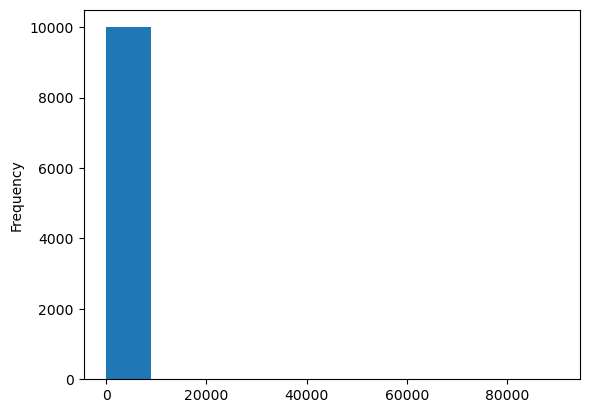

In [6]:
# Plot the 1st column as a histogram
df["measure_1"].plot(kind="hist")

<Axes: ylabel='Frequency'>

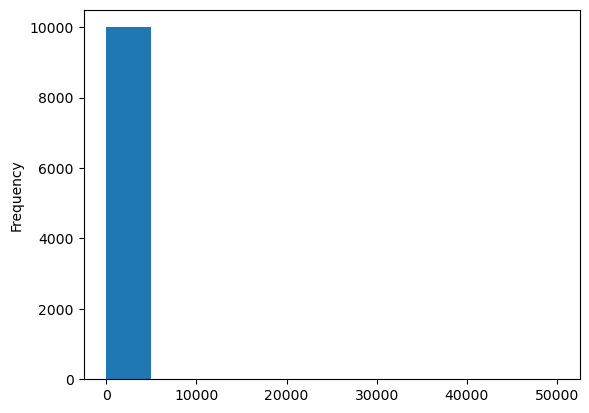

In [7]:
# Plot the 2nd column as a histogram
df["measure_2"].plot(kind="hist")

<Axes: ylabel='Frequency'>

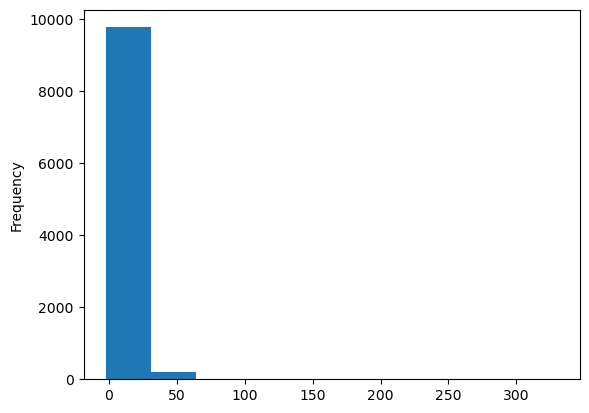

In [8]:
# Plot the 3rd column as a histogram
df["measure_3"].plot(kind="hist")

In [12]:
# Calculate the lower and upper quantile values for each column

m1_q_low = df['measure_1'].quantile(0.05)
m1_q_high = df['measure_1'].quantile(0.95)

m2_q_low = df['measure_2'].quantile(0.05)
m2_q_high = df['measure_2'].quantile(0.95)

m3_q_low = df['measure_3'].quantile(0.05)
m3_q_high = df['measure_3'].quantile(0.95)

1400.1000000000004


<Axes: ylabel='Frequency'>

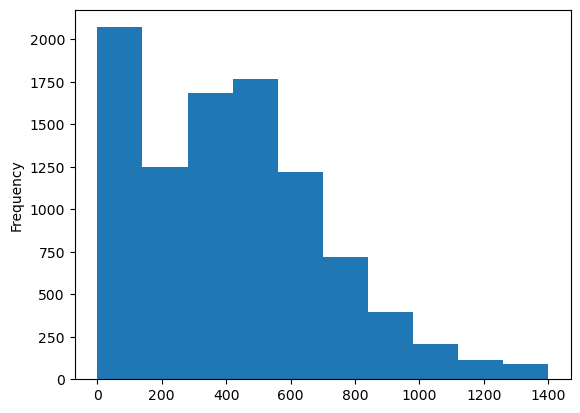

In [19]:
# Filter the first column and Plot the column as a histogram

filtered_data = df[(df['measure_1'] >= m1_q_low) & (df['measure_1'] <= m1_q_high)]

filtered_data["measure_1"].plot(kind="hist")

<Axes: ylabel='Frequency'>

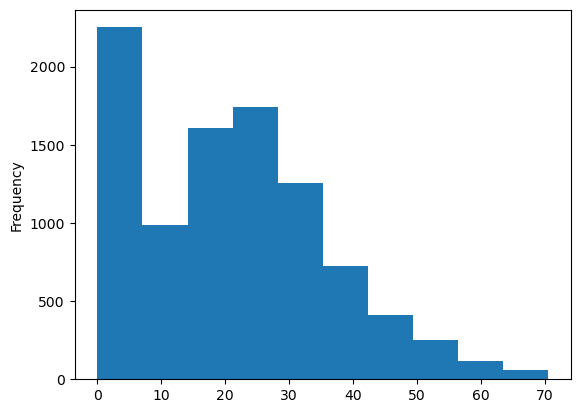

In [20]:
# Filter the 2nd column and Plot the column as a histogram

filtered_data2 = filtered_data[(filtered_data['measure_2'] >= m2_q_low) & (filtered_data['measure_2'] <= m2_q_high)]
filtered_data2["measure_2"].plot(kind="hist")

<Axes: ylabel='Frequency'>

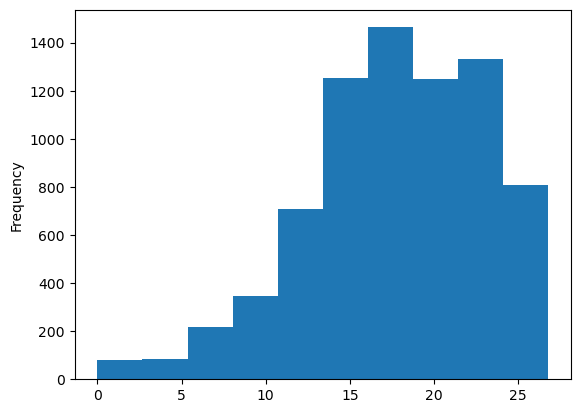

In [23]:
# Filter the 2nd column and Plot the column as a histogram

filtered_data3 = filtered_data2[(filtered_data2['measure_3'] >= 0) & (filtered_data2['measure_3'] <= m3_q_high)]
filtered_data3["measure_3"].plot(kind="hist")

In [24]:
filtered_data3.describe()

,measure_1,measure_2,measure_3
count,7540.000000,7540.000000,7540.000000
mean,452.949867,25.104304,17.710223
std,267.102938,13.603870,5.291037
min,0.000000,0.000000,0.000000
25%,265.000000,16.000000,14.520000
50%,434.000000,24.080000,17.970000
75%,610.000000,33.000000,21.950000
max,1400.000000,70.500000,26.780000
